In [83]:
import uproot
import awkward as ak
import numpy as np
import time
import vector
vector.register_awkward()
import matplotlib.pyplot as plt
import hist

In [84]:
ttbar2 = uproot.open(("1124cc06-0620-45ae-9ba8-41d4a8202a78.root"))["Events"]

In [85]:
arraytt2 = ttbar2.arrays()

In [86]:
tt2muon = ak.zip({
    "pt": arraytt2.Muon_pt,
    "eta": arraytt2.Muon_eta,
    "phi": arraytt2.Muon_phi,
    "mass": arraytt2.Muon_mass,
    "charge": arraytt2.Muon_charge
}, with_name="Momentum4D")

In [87]:
tt2pair = ak.combinations(tt2muon, 2)
tt2pair1, tt2pair2 = ak.unzip(tt2pair)
tt_os = (tt2pair1.charge + tt2pair2.charge) == 0

In [88]:
tt2_z_cand = tt2pair1[tt_os] + tt2pair2[tt_os]

In [89]:
tt2_z_mass = tt2_z_cand.mass
flat_tt2_mass = ak.flatten(tt2_z_mass)

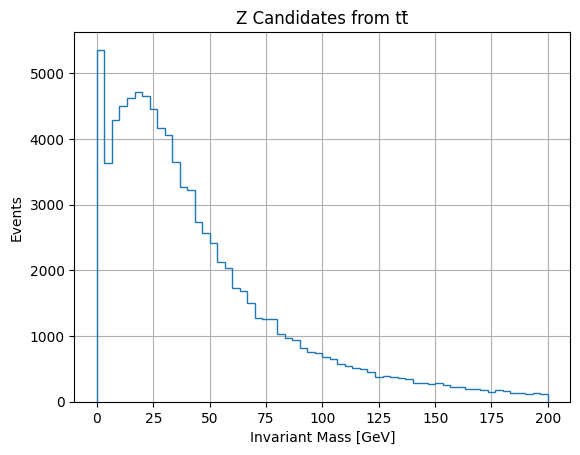

In [90]:
plt.hist(flat_tt2_mass, bins=60, range=(0, 200), histtype="step")
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Events")
plt.title("Z Candidates from tt̄")
plt.grid(True)
plt.show()

In [91]:
jet_mask = (arraytt2.Jet_pt > 30) & (abs(arraytt2.Jet_eta) < 2.5)

In [92]:
tt2jets = ak.zip({"pt": arraytt2.Jet_pt,
                "eta": arraytt2.Jet_eta, 
                "phi": arraytt2.Jet_phi, 
                "mass": arraytt2.Jet_mass,
                "btag": arraytt2.Jet_btagDeepFlavB}, 
                with_name="Momentum4D")

In [93]:
sortedtt2jets = tt2jets[ak.argsort(tt2jets.pt, axis = -1, ascending=False)]
sortedtt2jets = sortedtt2jets[ak.num(sortedtt2jets) >= 2]

In [94]:
tt2_lead = sortedtt2jets[:, 0]
tt2_sub = sortedtt2jets[:, 1]

In [95]:
flat_tt2_pt = ak.flatten(tt2_z_cand.pt)
flat_tt2_phi = ak.flatten(tt2_z_cand.phi)
flat_tt2_eta = ak.flatten(tt2_z_cand.eta)

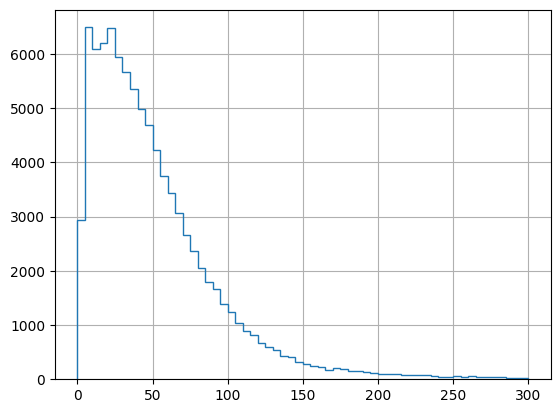

In [96]:
plt.hist(flat_tt2_pt, bins=60, range=(0,300), histtype="step")
plt.grid(True)
plt.show()

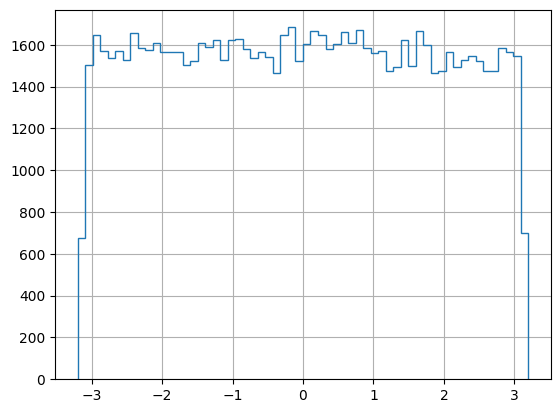

In [97]:
plt.hist(flat_tt2_phi, bins=60, range=(-3.2,3.2), histtype="step")
plt.grid(True)
plt.show()

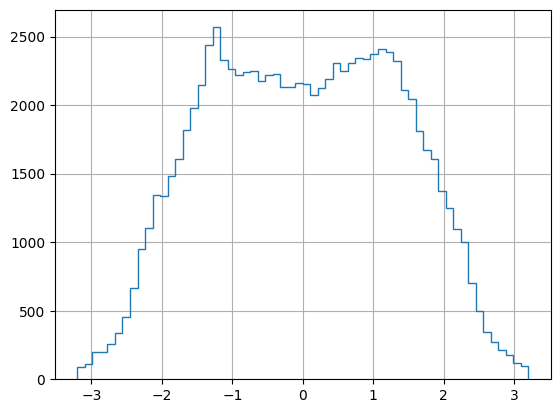

In [98]:
plt.hist(flat_tt2_eta, bins=60, range=(-3.2,3.2), histtype="step")
plt.grid(True)
plt.show()

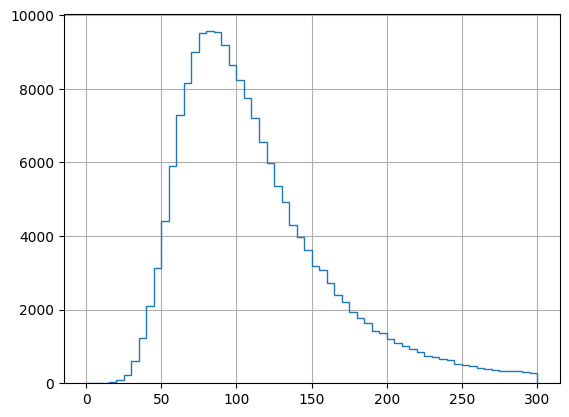

In [99]:
plt.hist(tt2_lead.pt, bins=60, range=(0,300), histtype="step")
plt.grid(True)
plt.show()

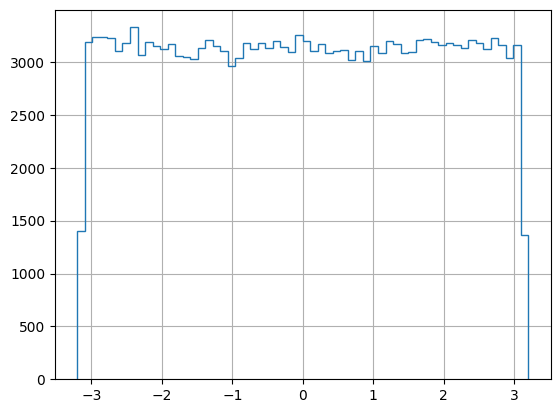

In [100]:
plt.hist(tt2_lead.phi, bins=60, range=(-3.2,3.2), histtype="step")
plt.grid(True)
plt.show()

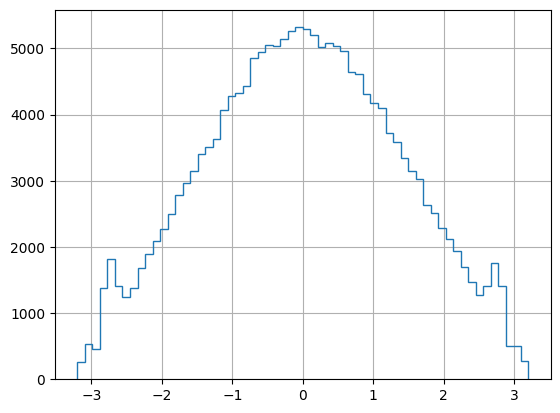

In [101]:
plt.hist(tt2_lead.eta, bins=60, range=(-3.2,3.2), histtype="step")
plt.grid(True)
plt.show()

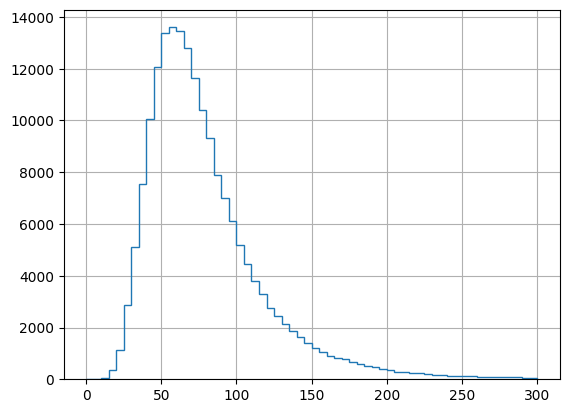

In [102]:
plt.hist(tt2_sub.pt, bins=60, range=(0,300), histtype="step")
plt.grid(True)
plt.show()

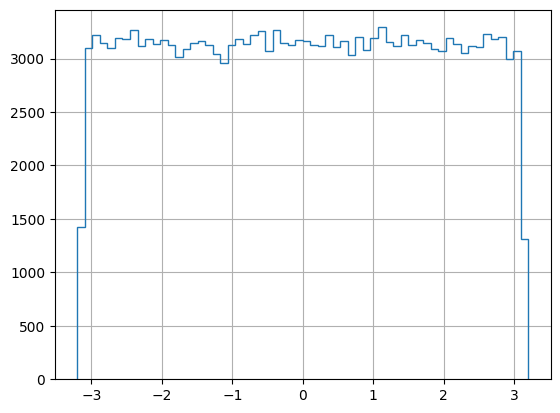

In [103]:
plt.hist(tt2_sub.phi, bins=60, range=(-3.2,3.2), histtype="step")
plt.grid(True)
plt.show()

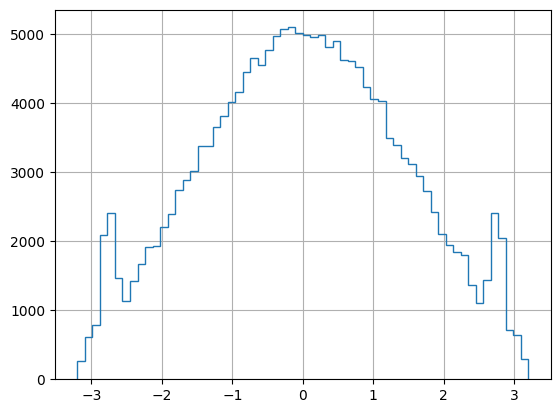

In [104]:
plt.hist(tt2_sub.eta, bins=60, range=(-3.2,3.2), histtype="step")
plt.grid(True)
plt.show()

In [105]:
jet_btag = arraytt2.Jet_btagDeepFlavB
btag_score = jet_btag[jet_mask]
n_btagged = ak.sum(btag_score > 0.277, axis = 1)

In [106]:
z_mask = (tt2_z_cand.pt > 25) & (abs(tt2_z_cand.eta) < 2.5) & (n_btagged == 0)

In [107]:
jet_mask2 = jet_mask & (n_btagged == 0)

In [108]:
R2Jets = tt2jets[jet_mask2]
R2_z_cand = tt2_z_cand[z_mask]

In [109]:
sortedtt2R2jets = R2Jets[ak.argsort(R2Jets.pt, axis=1 , ascending=False)]
sortedtt2R2jets = sortedtt2R2jets[ak.num(sortedtt2R2jets) >= 2]

In [110]:
lead_R2 = sortedtt2R2jets[:, 0]
sub_R2 = sortedtt2R2jets[:, 1]

In [111]:
flat_r2_z_pt = ak.flatten(R2_z_cand.pt)
flat_r2_z_phi = ak.flatten(R2_z_cand.phi)
flat_r2_z_eta = ak.flatten(R2_z_cand.eta)
flat_r2_z_mass = ak.flatten(R2_z_cand.mass)

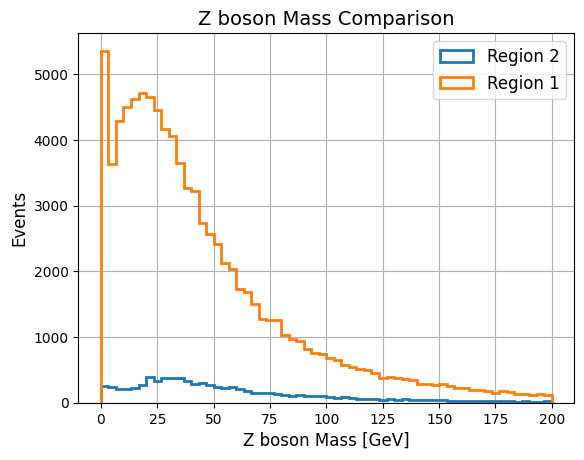

In [112]:
plt.hist(flat_r2_z_mass, bins=60, range=(0,200), histtype="step", linewidth=2, label="Region 2")
plt.hist(flat_tt2_mass, bins=60, range=(0,200), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Z boson Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z boson Mass Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

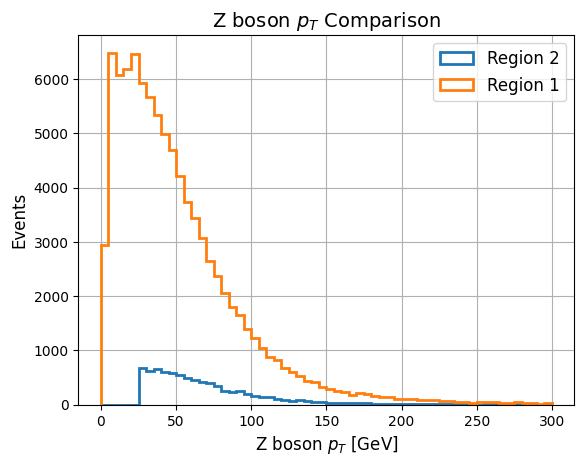

In [113]:
plt.hist(flat_r2_z_pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Region 2")
plt.hist(flat_tt2_pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Z boson $p_T$ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z boson $p_T$ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

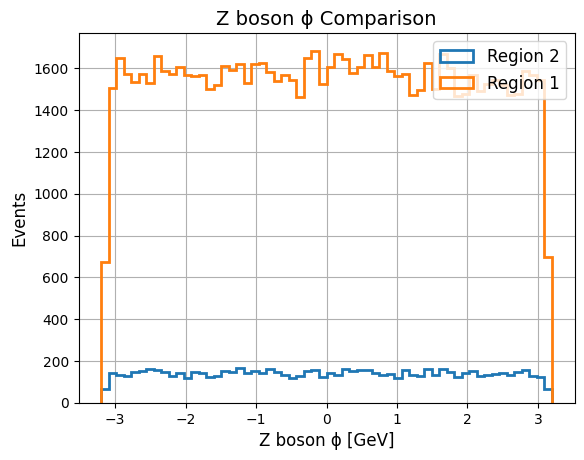

In [114]:
plt.hist(flat_r2_z_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(flat_tt2_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Z boson ϕ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z boson ϕ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

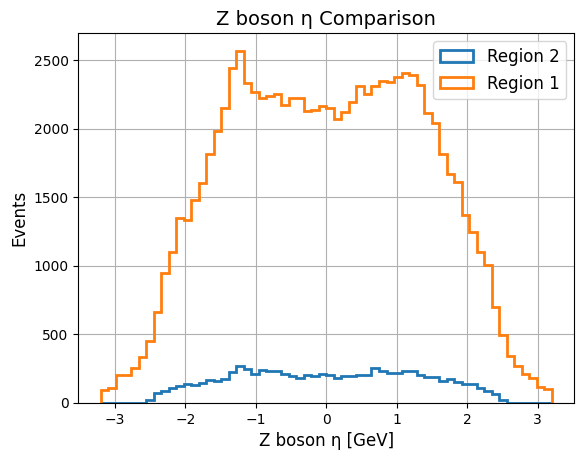

In [115]:
plt.hist(flat_r2_z_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(flat_tt2_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Z boson η [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z boson η Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

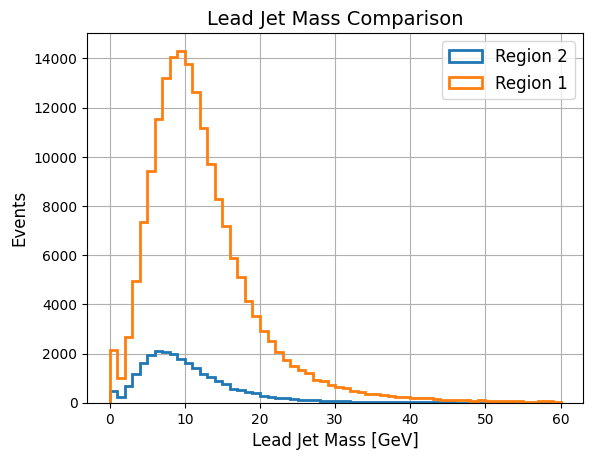

In [116]:
plt.hist(lead_R2.mass, bins=60, range=(0,60), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt2_lead.mass, bins=60, range=(0,60), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Mass Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

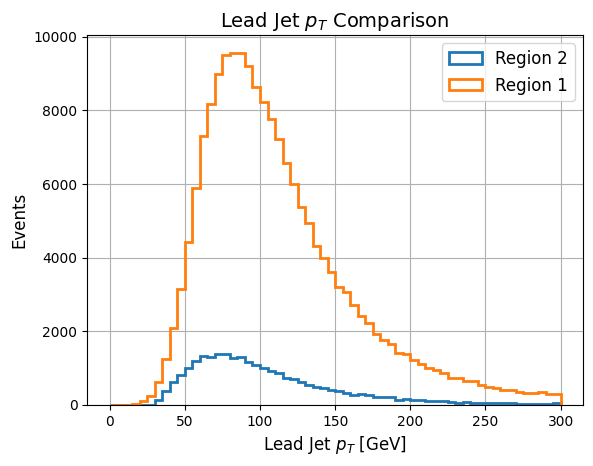

In [117]:
plt.hist(lead_R2.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt2_lead.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet $p_T$ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet $p_T$ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

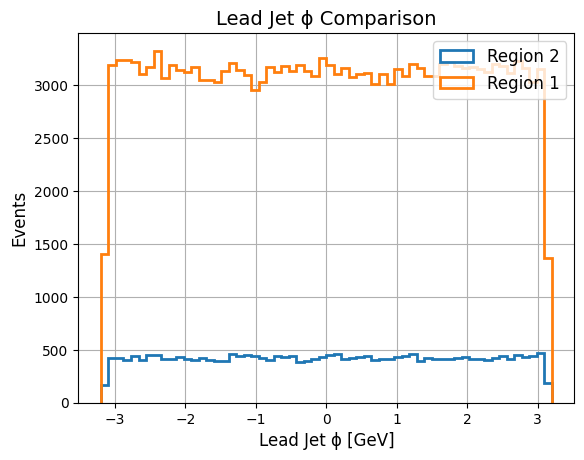

In [118]:
plt.hist(lead_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt2_lead.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet ϕ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet ϕ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

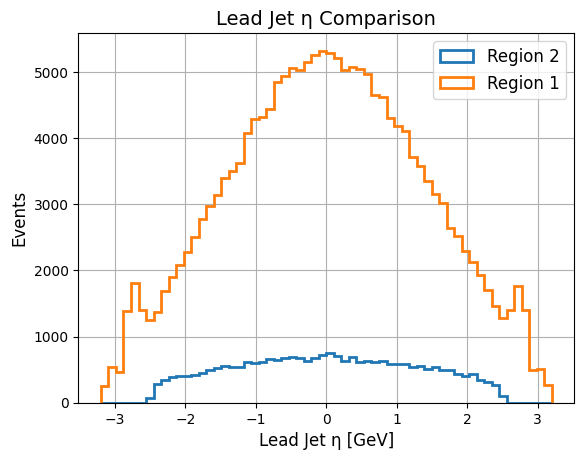

In [119]:
plt.hist(lead_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt2_lead.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet η [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet η Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

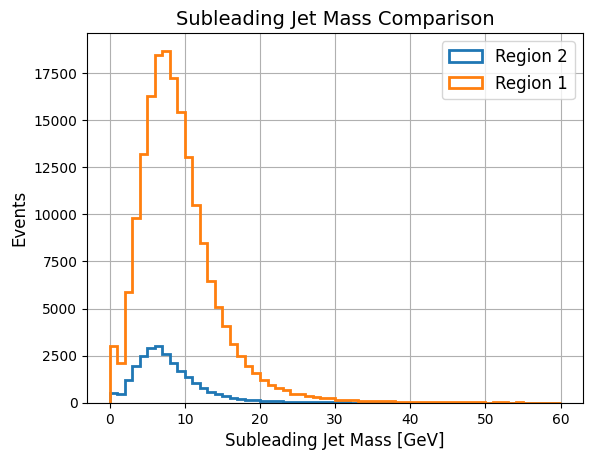

In [120]:
plt.hist(sub_R2.mass, bins=60, range=(0,60), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt2_sub.mass, bins=60, range=(0,60), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Subleading Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Subleading Jet Mass Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

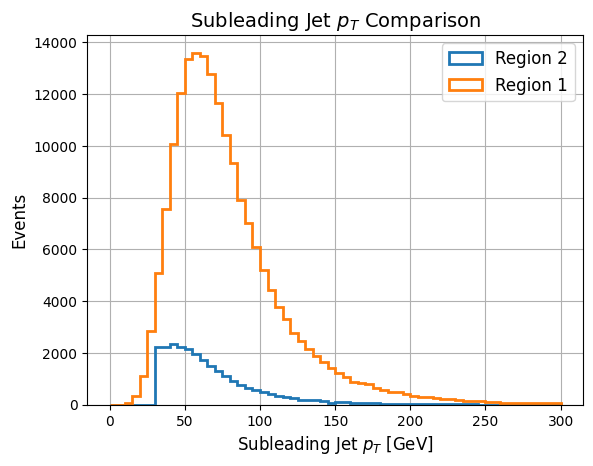

In [121]:
plt.hist(sub_R2.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt2_sub.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Subleading Jet $p_T$ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Subleading Jet $p_T$ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

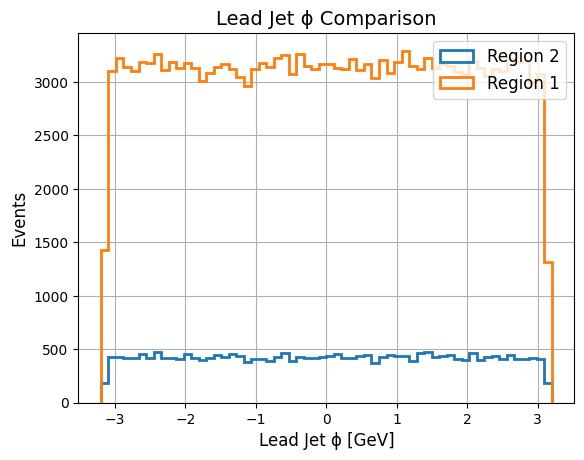

In [122]:
plt.hist(sub_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt2_sub.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet ϕ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet ϕ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

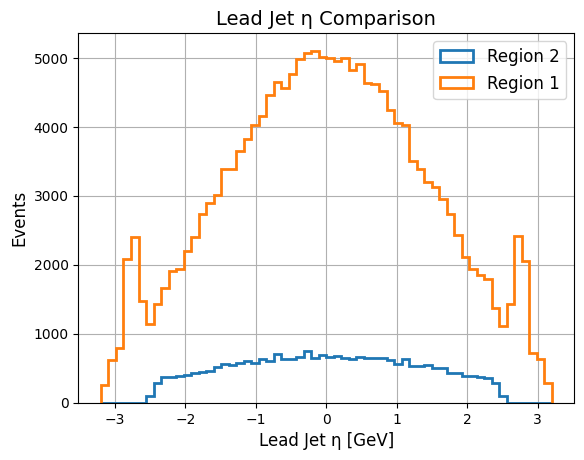

In [123]:
plt.hist(sub_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt2_sub.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet η [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet η Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

In [124]:
#------------------------------------

In [125]:
dy2 = uproot.open(("146c5ab1-8b3b-4a1b-a7e4-6e7c9efae4ee.root"))["Events"]

In [126]:
arraydy2 = dy2.arrays()

In [127]:
dy2muons = ak.zip({"pt": arraydy2.Muon_pt,
                "eta": arraydy2.Muon_eta, 
                "phi": arraydy2.Muon_phi, 
                "mass": arraydy2.Muon_mass,
                "charge": arraydy2.Muon_charge}, 
                with_name="Momentum4D")

In [128]:
pairdy2 = ak.combinations(dy2muons, 2)
dy2pair1, dy2pair2 = ak.unzip(pairdy2) 

In [129]:
dy2_os = (dy2pair1.charge + dy2pair2.charge) == 0

In [130]:
dy2_z_cand = dy2pair1[dy2_os] + dy2pair2[dy2_os]

In [131]:
dy2_z_mass = dy2_z_cand.mass
flatdy2_mass = ak.flatten(dy2_z_mass)

In [132]:
jet_mask = (arraydy2.Jet_pt > 30) & (abs(arraydy2.Jet_eta) < 2.5)

In [133]:
dy2jets = ak.zip({"pt": arraydy2.Jet_pt,
                "eta": arraydy2.Jet_eta, 
                "phi": arraydy2.Jet_phi, 
                "mass": arraydy2.Jet_mass,
                "btag": arraydy2.Jet_btagDeepFlavB}, 
                with_name="Momentum4D")

In [134]:
sortdy2jets = dy2jets[ak.argsort(dy2jets.pt, axis=-1, ascending=False)]
sortdy2jets = sortdy2jets[ak.num(sortdy2jets) >= 2]

In [135]:
dy2_lead = sortdy2jets[:, 0]
dy2_sub = sortdy2jets[:, 1]

In [136]:
flatdy2_pt = ak.flatten(dy2_z_cand.pt)
flatdy2_phi = ak.flatten(dy2_z_cand.phi)
flatdy2_eta = ak.flatten(dy2_z_cand.eta)

In [137]:
jet_btag = arraydy2.Jet_btagDeepFlavB
btag_score = jet_btag[jet_mask]
n_btagged = ak.sum(btag_score > 0.277, axis = 1)

In [138]:
z_mask = (dy2_z_cand.pt > 25) & (abs(dy2_z_cand.eta) < 2.5) & (n_btagged == 0)

In [139]:
jet_mask2 = (jet_mask) & (n_btagged == 0)

In [140]:
dy2_R2Jets = dy2jets[jet_mask2]
dy2_R2_Z_Cand = dy2_z_cand[z_mask]

In [142]:
sortdy2R2jets = dy2_R2Jets[ak.argsort(dy2_R2Jets.pt, axis=1 , ascending=False)]
sortdy2R2jets = sortdy2R2jets[ak.num(sortdy2R2jets) >= 2]

In [143]:
dy2_lead_R2 = sortdy2R2jets[:, 0]
dy2_sub_R2 = sortdy2R2jets[:, 1]

In [144]:
dy2_flat_r2_z_pt = ak.flatten(dy2_R2_Z_Cand.pt)
dy2_flat_r2_z_phi = ak.flatten(dy2_R2_Z_Cand.phi)
dy2_flat_r2_z_eta = ak.flatten(dy2_R2_Z_Cand.eta)
dy2_flat_r2_z_mass = ak.flatten(dy2_R2_Z_Cand.mass)

In [145]:
#---------------------------------------------------

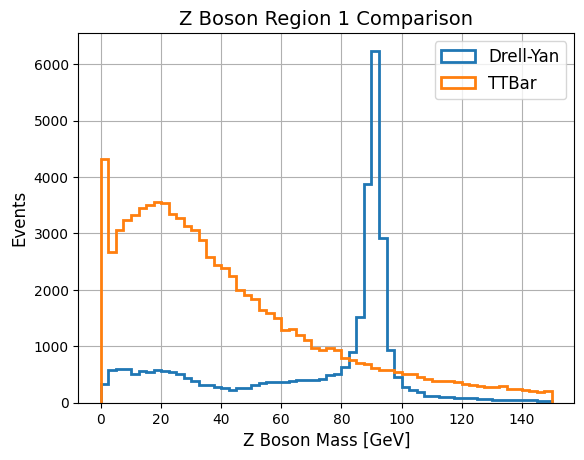

In [146]:
plt.hist(flatdy2_mass, bins=60, range=(0,150), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_tt2_mass, bins=60, range=(0,150), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

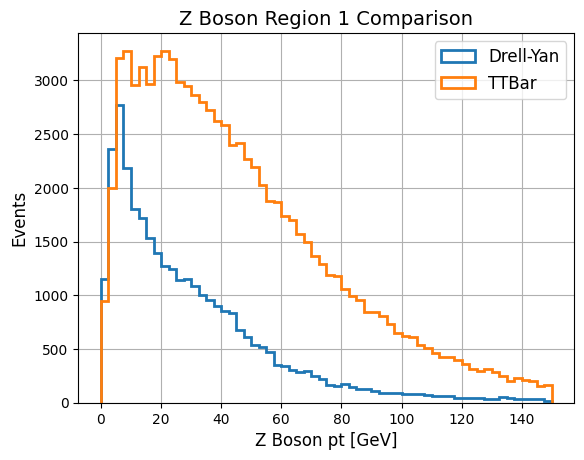

In [147]:
plt.hist(flatdy2_pt, bins=60, range=(0,150), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_tt2_pt, bins=60, range=(0,150), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

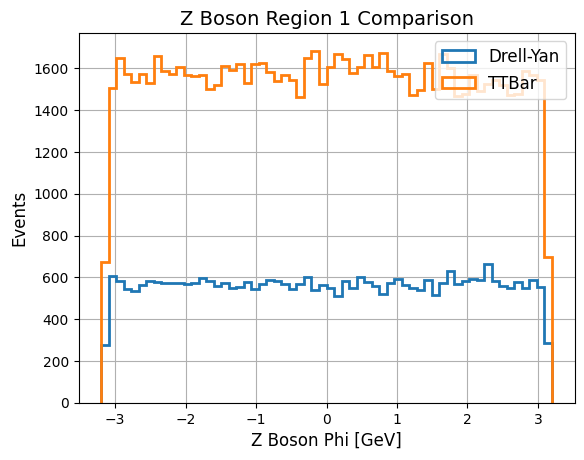

In [148]:
plt.hist(flatdy2_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_tt2_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

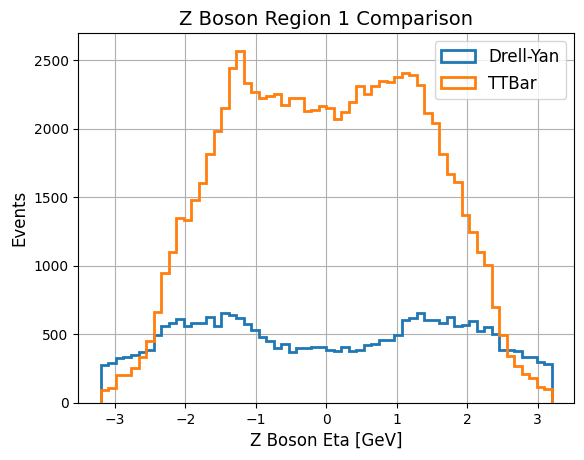

In [149]:
plt.hist(flatdy2_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_tt2_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

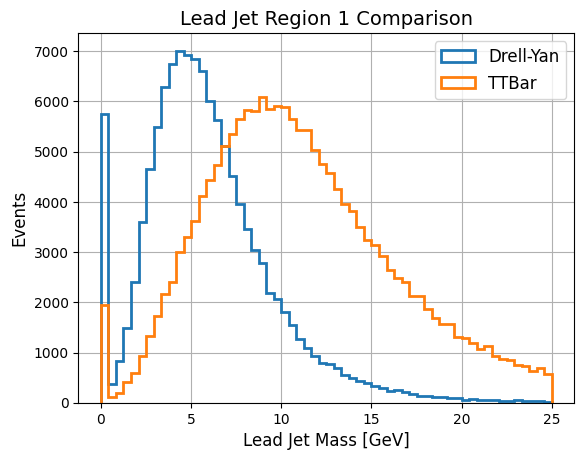

In [150]:
plt.hist(dy2_lead.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt2_lead.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

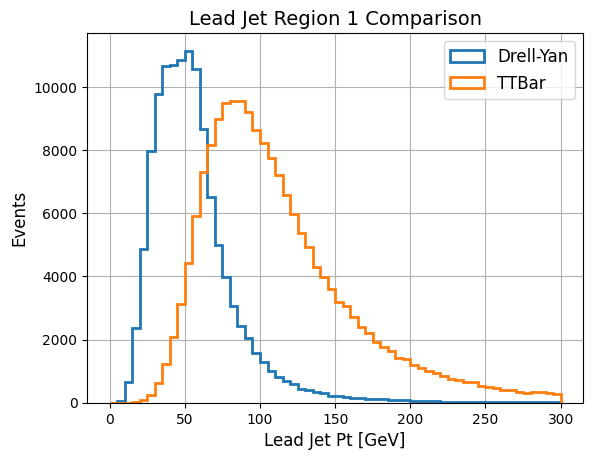

In [151]:
plt.hist(dy2_lead.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt2_lead.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

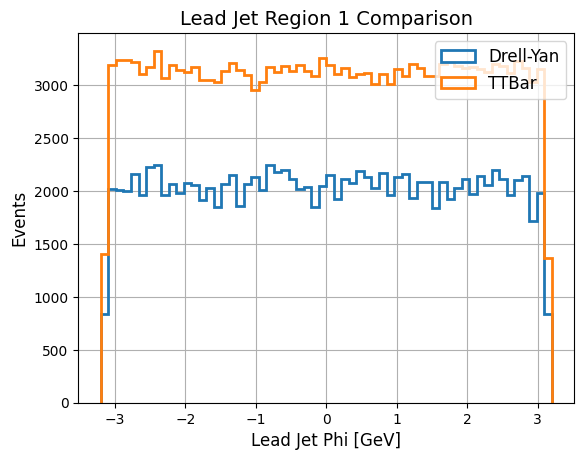

In [152]:
plt.hist(dy2_lead.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt2_lead.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

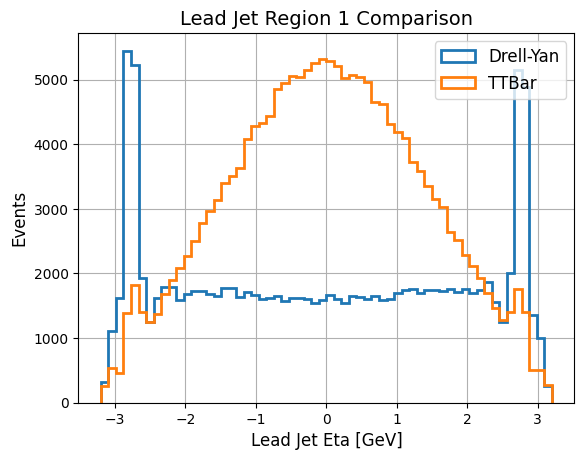

In [153]:
plt.hist(dy2_lead.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt2_lead.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

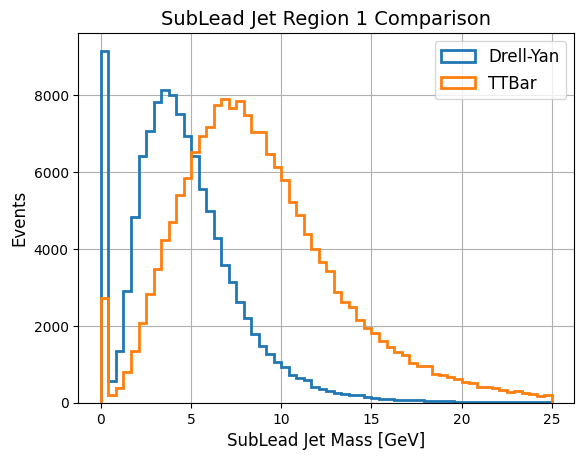

In [154]:
plt.hist(dy2_sub.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt2_sub.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

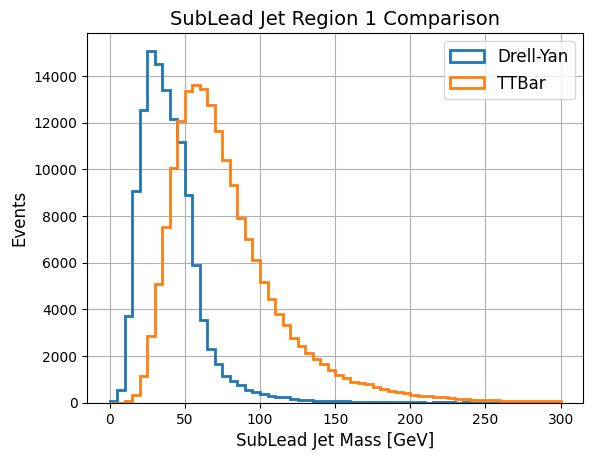

In [155]:
plt.hist(dy2_sub.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt2_sub.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

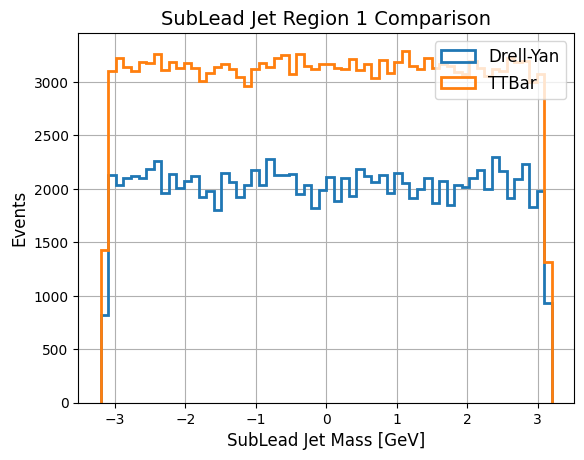

In [156]:
plt.hist(dy2_sub.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt2_sub.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

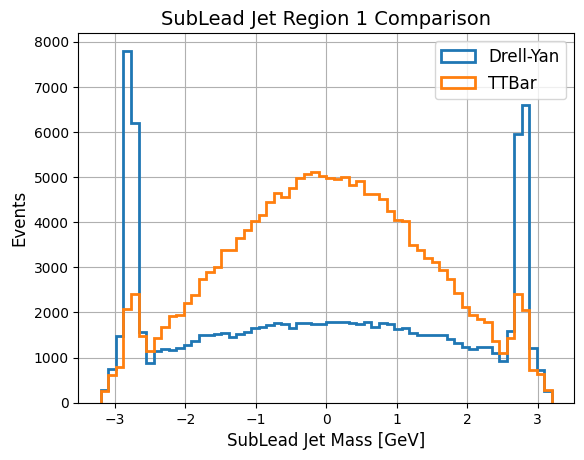

In [157]:
plt.hist(dy2_sub.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt2_sub.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

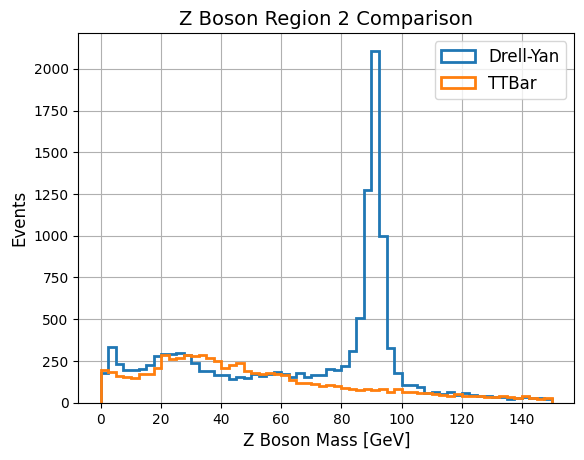

In [158]:
plt.hist(dy2_flat_r2_z_mass, bins=60, range=(0,150), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_r2_z_mass, bins=60, range=(0,150), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

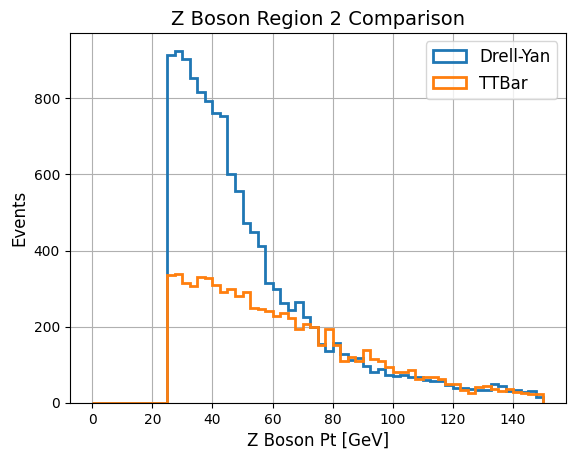

In [160]:
plt.hist(dy2_flat_r2_z_pt, bins=60, range=(0,150), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_r2_z_pt, bins=60, range=(0,150), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

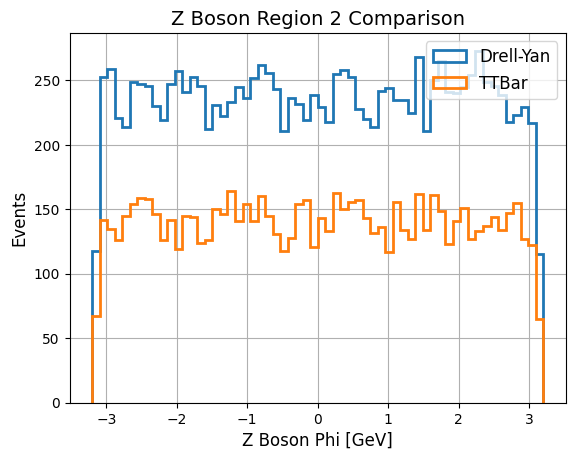

In [161]:
plt.hist(dy2_flat_r2_z_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_r2_z_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

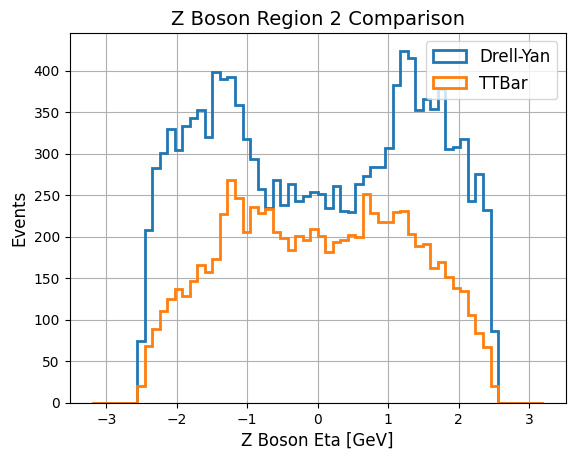

In [162]:
plt.hist(dy2_flat_r2_z_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_r2_z_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

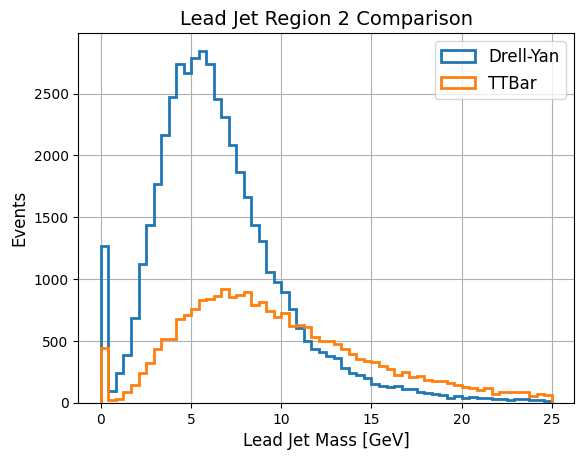

In [163]:
plt.hist(dy2_lead_R2.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(lead_R2.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

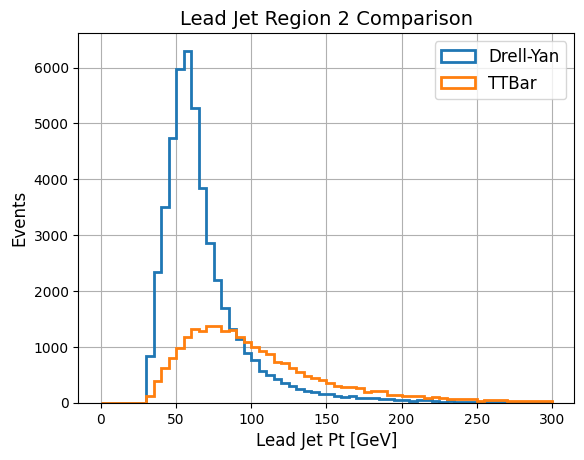

In [164]:
plt.hist(dy2_lead_R2.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(lead_R2.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

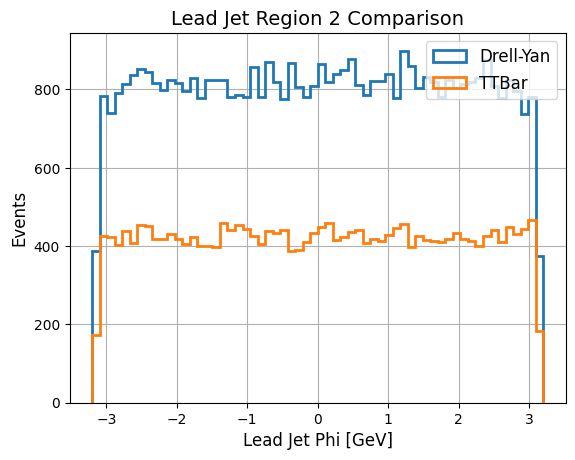

In [165]:
plt.hist(dy2_lead_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(lead_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

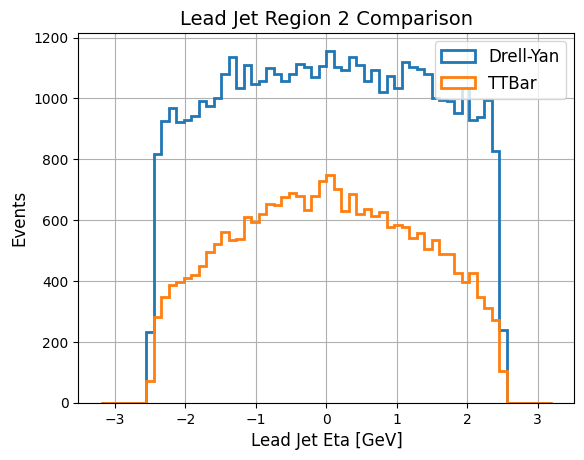

In [166]:
plt.hist(dy2_lead_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(lead_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

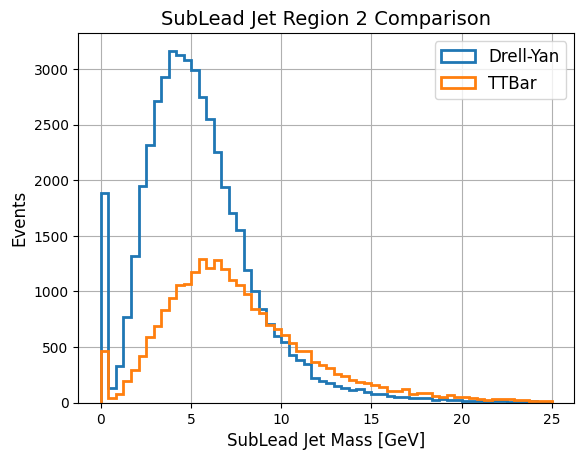

In [167]:
plt.hist(dy2_sub_R2.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(sub_R2.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

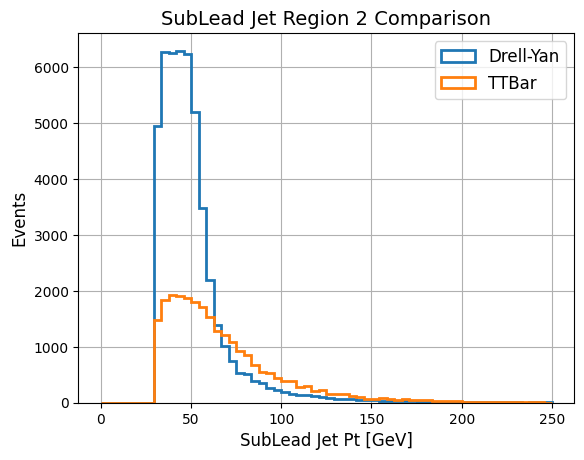

In [168]:
plt.hist(dy2_sub_R2.pt, bins=60, range=(0,250), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(sub_R2.pt, bins=60, range=(0,250), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

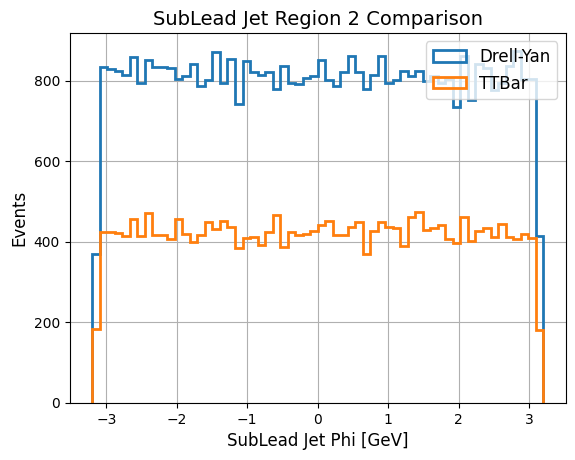

In [169]:
plt.hist(dy2_sub_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(sub_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

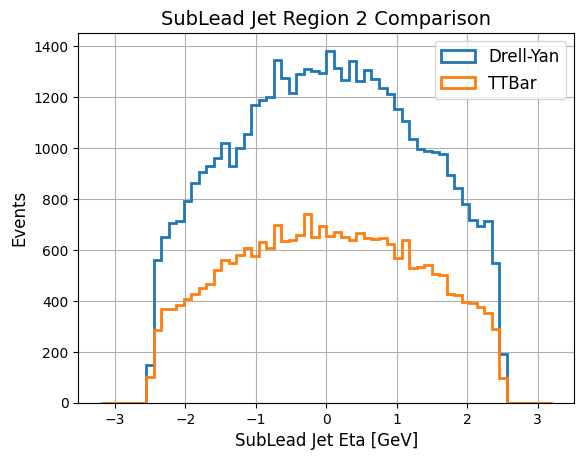

In [170]:
plt.hist(dy2_sub_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(sub_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()